In [21]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
from pandas import json_normalize

In [22]:
#Load all the match events for analysis

event = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/9695.json')
event = event.json()

#transform json file to DataFrame

dfa = json_normalize(event,sep="_")

In [23]:
# lets remove(...) to display the entire dataframe

pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

In [24]:
#lets have a look at the extracted data

dfa.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,pass_switch,pass_cross,counterpress,pass_aerial_won,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_type_id,goalkeeper_type_name,dribble_outcome_id,dribble_outcome_name,ball_recovery_recovery_failure,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_backheel,foul_won_defensive,dribble_overrun,foul_committed_advantage,foul_won_advantage,shot_first_time,foul_committed_card_id,foul_committed_card_name,pass_deflected,pass_goal_assist,shot_one_on_one,shot_open_goal,block_offensive,50_50_outcome_id,50_50_outcome_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,pass_cut_back
0,1afbab6e-19b0-49a2-8d89-0c85e2ca2613,1,1,00:00:00.000,0,0,1,0.00,35,Starting XI,207,Valencia,1,Regular Play,207,Valencia,442.0,"[{'player': {'id': 6590, 'name': 'Norberto Mur...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8bb41633-7490-4cb1-9bfc-70758595ba43,2,1,00:00:00.000,0,0,1,0.00,35,Starting XI,207,Valencia,1,Regular Play,217,Barcelona,4222.0,"[{'player': {'id': 20055, 'name': 'Marc-André ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6e2f3a19-e7ca-4137-8125-64d2d226c51a,3,1,00:00:00.000,0,0,1,0.00,18,Half Start,207,Valencia,1,Regular Play,217,Barcelona,NaN,NaN,[0bd0f748-2930-40d0-ab58-6337a844ad6b],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0bd0f748-2930-40d0-ab58-6337a844ad6b,4,1,00:00:00.000,0,0,1,0.00,18,Half Start,207,Valencia,1,Regular Play,207,Valencia,NaN,NaN,[6e2f3a19-e7ca-4137-8125-64d2d226c51a],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48519c93-c49f-444e-b191-ff168fc56fa6,5,1,00:00:00.720,0,0,2,0.31,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[03d9d57c-67a0-48f2-b8ce-997b769cac15],"[61.0, 41.0]",5

In [25]:
# lets see how many times events occured in the match

events_occurance = dfa['type_name'].value_counts()

In [26]:
valencia_possession = dfa.loc[(dfa['possession_team_name']=='Valencia') & (dfa['type_name']=='Pass')]
valencia_possession.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,pass_switch,pass_cross,counterpress,pass_aerial_won,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_type_id,goalkeeper_type_name,dribble_outcome_id,dribble_outcome_name,ball_recovery_recovery_failure,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_backheel,foul_won_defensive,dribble_overrun,foul_committed_advantage,foul_won_advantage,shot_first_time,foul_committed_card_id,foul_committed_card_name,pass_deflected,pass_goal_assist,shot_one_on_one,shot_open_goal,block_offensive,50_50_outcome_id,50_50_outcome_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,pass_cut_back
123,bb7c05c2-12d8-4998-acb4-83531e55c6dd,124,1,00:01:33.972,1,33,3,1.040,30,Pass,207,Valencia,1,Regular Play,207,Valencia,NaN,NaN,"[4c670cf2-f901-4b53-8d28-22f4dc40678d, a82f4de...","[18.0, 28.0]",6596.0,José Luis Gayá Peña,6.0,Left Back,4367.0,Gonçalo Manuel Ganchinho Guedes,9.000000,0.000000,2.0,Low Pass,"[27.0, 28.0]",66.0,Recovery,37.0,Head,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,53f6bd3e-372f-447c-b35b-ffb4768a5b04,128,1,00:01:36.083,1,36,3,0.879,30,Pass,207,Valencia,1,Regular Play,207,Valencia,NaN,NaN,[a16af074-f51b-4195-920a-660c965494e3],"[22.0, 27.0]",4367.0,Gonçalo Manuel Ganchinho Guedes,16.0,Left Midfield,6596.0,José Luis Gayá Peña,9.433981,-2.582993,1.0,Ground Pass,"[14.0, 22.0]",NaN,NaN,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,571b356b-cfb3-45d3-aced-95934b7f97fb,132,1,00:01:37.002,1,37,3,3.296,30,Pass,207,Valencia,1,Regular Play,207,Valencia,NaN,NaN,"[a0296516-d13b-4a06-83b2-60d04a20a322, ef50636...","[14.0, 22.0]",6596.0,José Luis Gayá Peña,6.0,Left Back,5718.0,Rodrigo Moreno Machado,32.140316,0.093477,3.0,High Pass,"[46.0, 25.0]",NaN,NaN,38.0,Left Foot,NaN,NaN,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,a0296516-d13b-4a06-83b2-60d04a20a322,134,1,00:01:40.298,1,40,3,1.113,30,Pass,207,Valencia,1,Regular Play,217,Barcelona,NaN,NaN,"[571b356b-cfb3-45d3-aced-95934b7f97fb, 5f2f600...","[75.0, 57.0]",5492.0,Samuel Yves Umtiti,3.0,Right Center Back,NaN,NaN,4.123106,-0.244979,3.0,High Pass,"[79.0, 56.0]",66.0,Recovery,NaN,NaN,NaN,True,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,N

In [27]:
#check against null values
valencia_possession['location'].isnull().sum()

0

In [28]:
messi_passes = dfa.loc[(dfa['type_name']=='Pass') & (dfa['player_id']==5503.0)]
messi_passes.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,pass_switch,pass_cross,counterpress,pass_aerial_won,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_type_id,goalkeeper_type_name,dribble_outcome_id,dribble_outcome_name,ball_recovery_recovery_failure,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_backheel,foul_won_defensive,dribble_overrun,foul_committed_advantage,foul_won_advantage,shot_first_time,foul_committed_card_id,foul_committed_card_name,pass_deflected,pass_goal_assist,shot_one_on_one,shot_open_goal,block_offensive,50_50_outcome_id,50_50_outcome_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,pass_cut_back
32,91319f85-5930-4d17-aa6e-fbdb7a378dd0,33,1,00:00:24.473,0,24,2,0.608,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[82f76cdb-55f2-4745-bb10-a7b48bc15067],"[71.0, 62.0]",5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,5470.0,Ivan Rakitić,5.830952,-2.111216,1.0,Ground Pass,"[68.0, 57.0]",NaN,NaN,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,54cdceb5-0df5-4410-aeae-597025beceaf,40,1,00:00:27.645,0,27,2,2.956,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[ebda9f45-3da9-4dfc-9434-869456947da8],"[66.0, 55.0]",5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,5216.0,Andrés Iniesta Luján,37.013510,-1.543776,1.0,Ground Pass,"[67.0, 18.0]",NaN,NaN,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,63ea3a2e-8ea4-41f6-912e-7beaf03cdee6,93,1,00:01:06.412,1,6,2,0.864,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[c46ebfb0-549e-4c75-852e-a097132fe155],"[85.0, 62.0]",5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,5542.0,José Paulo Bezzera Maciel Júnior,7.211102,2.553590,1.0,Ground Pass,"[79.0, 66.0]",NaN,NaN,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,ffdba21d-a4b6-4c71-b3bd-3aa694483c90,174,1,00:02:18.707,2,18,7,1.590,30,Pass,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,"[63408545-df46-4432-a47c-fb0d7aeb7303, d72b1e9...","[82.0, 74.0]",5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,5542.0,José Paulo Bezzera Maciel Júnior,9.848858,-1.989021,1.0,Ground Pass,"[78.0, 65.0]",NaN,NaN,40

In [29]:
# spread the coordinates under the location column, and added to the barcelona dataframe
locations_xy = messi_passes['location'].apply(pd.Series)
locations_xy.columns=['x','y']
messi_passes[['x','y']]=locations_xy[['x','y']]

c:\users\ncmol\appdata\local\programs\common\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
# checking against null values
messi_passes['location'].isnull().sum()

0

In [31]:
messi_passes.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,pass_switch,pass_cross,counterpress,pass_aerial_won,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_type_id,goalkeeper_type_name,dribble_outcome_id,dribble_outcome_name,ball_recovery_recovery_failure,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_backheel,foul_won_defensive,dribble_overrun,foul_committed_advantage,foul_won_advantage,shot_first_time,foul_committed_card_id,foul_committed_card_name,pass_deflected,pass_goal_assist,shot_one_on_one,shot_open_goal,block_offensive,50_50_outcome_id,50_50_outcome_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,pass_cut_back,x,y
32,91319f85-5930-4d17-aa6e-fbdb7a378dd0,33,1,00:00:24.473,0,24,2,0.608,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[82f76cdb-55f2-4745-bb10-a7b48bc15067],"[71.0, 62.0]",5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,5470.0,Ivan Rakitić,5.830952,-2.111216,1.0,Ground Pass,"[68.0, 57.0]",NaN,NaN,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,62.0
39,54cdceb5-0df5-4410-aeae-597025beceaf,40,1,00:00:27.645,0,27,2,2.956,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[ebda9f45-3da9-4dfc-9434-869456947da8],"[66.0, 55.0]",5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,5216.0,Andrés Iniesta Luján,37.013510,-1.543776,1.0,Ground Pass,"[67.0, 18.0]",NaN,NaN,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,55.0
92,63ea3a2e-8ea4-41f6-912e-7beaf03cdee6,93,1,00:01:06.412,1,6,2,0.864,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[c46ebfb0-549e-4c75-852e-a097132fe155],"[85.0, 62.0]",5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,5542.0,José Paulo Bezzera Maciel Júnior,7.211102,2.553590,1.0,Ground Pass,"[79.0, 66.0]",NaN,NaN,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,62.0
173,ffdba21d-a4b6-4c71-b3bd-3aa694483c90,174,1,00:02:18.707,2,18,7,1.590,30,Pass,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,"[63408545-df46-4432-a47c-fb0d7aeb7303, d72b1e9...","[82.0, 74.0]",5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,5542.0,José Paulo Bezzera Maciel Júnior,9.848858,-1.989021,1.0,Gro

In [32]:
df_messi =messi_passes[['period','minute','second','type_name','x','y','player_name','pass_recipient_name','pass_outcome_name','pass_end_location']]
df_messi.head()

,period,minute,second,type_name,x,y,player_name,pass_recipient_name,pass_outcome_name,pass_end_location
32,1,0,24,Pass,71.0,62.0,Lionel Andrés Messi Cuccittini,Ivan Rakitić,NaN,"[68.0, 57.0]"
39,1,0,27,Pass,66.0,55.0,Lionel Andrés Messi Cuccittini,Andrés Iniesta Luján,NaN,"[67.0, 18.0]"
92,1,1,6,Pass,85.0,62.0,Lionel Andrés Messi Cuccittini,José Paulo Bezzera Maciel Júnior,NaN,"[79.0, 66.0]"
173,1,2,18,Pass,82.0,74.0,Lionel Andrés Messi Cuccittini,José Paulo Bezzera Maciel Júnior,NaN,"[78.0, 65.0]"
207,1,2,39,Pass,92.0,71.0,Lionel Andrés Messi Cuccittini,Ivan Rakitić,NaN,"[78.0, 72.0]"


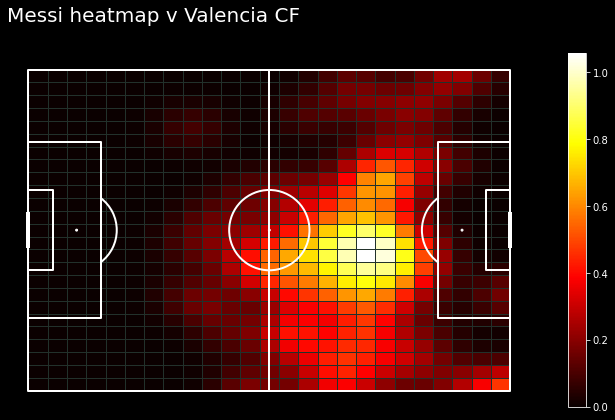

In [63]:

import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
plt.style.use('dark_background')

#setup pitch
fig, ax = plt.subplots(figsize = (15, 6.5))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')
pitch = Pitch(pitch_type ='statsbomb',line_color='white',line_zorder=2,orientation='horizontal',figsize=(15, 6.5))
pitch.draw(ax=ax)


bin_statistic = pitch.bin_statistic(df_messi['x'],df_messi['y'], statistic = 'count',bins = (25, 25))
bin_statistic['statistic']=gaussian_filter(bin_statistic['statistic'],1.3)
pcm = pitch.heatmap(bin_statistic, ax = ax, cmap='hot', edgecolors='#22312b')
cbar = fig.colorbar(pcm, ax=ax)
title = fig.suptitle('Messi heatmap v Valencia CF',x = 0.4,y=0.98, fontsize = 20)